In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/time-series-arima/testset.csv
/kaggle/input/time-series-arima/trainset.csv


In [3]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
ds=pd.read_csv('/kaggle/input/time-series-arima/trainset.csv')
ds.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


# Data Preprocessing

In [5]:
hcl = ds.dropna()

In [6]:
hcl.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Setting the date column asindex of our dataset

In [7]:
hcl.index = pd.to_datetime(hcl.Date)

In [8]:
hcl.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2013-01-02,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
2013-01-03,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2013-01-04,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
2013-01-07,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
2013-01-08,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


In [9]:
hcl.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2017-12-22,2017-12-22,1061.109985,1064.199951,1059.439941,1060.119995,1060.119995,755100
2017-12-26,2017-12-26,1058.069946,1060.119995,1050.199951,1056.739990,1056.739990,760600
2017-12-27,2017-12-27,1057.390015,1058.369995,1048.050049,1049.369995,1049.369995,1271900
2017-12-28,2017-12-28,1051.599976,1054.750000,1044.770020,1048.140015,1048.140015,837100
2017-12-29,2017-12-29,1046.719971,1049.699951,1044.900024,1046.400024,1046.400024,887500


Selecting the column as our timeseries for forcasting

In [11]:
hcl=hcl['Close']['2013-01-02':'2013-12-01']

In [12]:
hcl.head()

Date
2013-01-02    359.288177
2013-01-03    359.496826
2013-01-04    366.600616
2013-01-07    365.001007
2013-01-08    364.280701
Name: Close, dtype: float64

In [13]:
hcl.tail()

Date
2013-11-22    512.610962
2013-11-25    519.585571
2013-11-26    525.785278
2013-11-27    528.120117
2013-11-29    526.371460
Name: Close, dtype: float64

In [15]:
hcl.describe()

count    231.000000
mean     430.227327
std       40.361804
min      349.164032
25%      400.656616
50%      433.172638
75%      445.293793
max      528.120117
Name: Close, dtype: float64

# Data Exploration

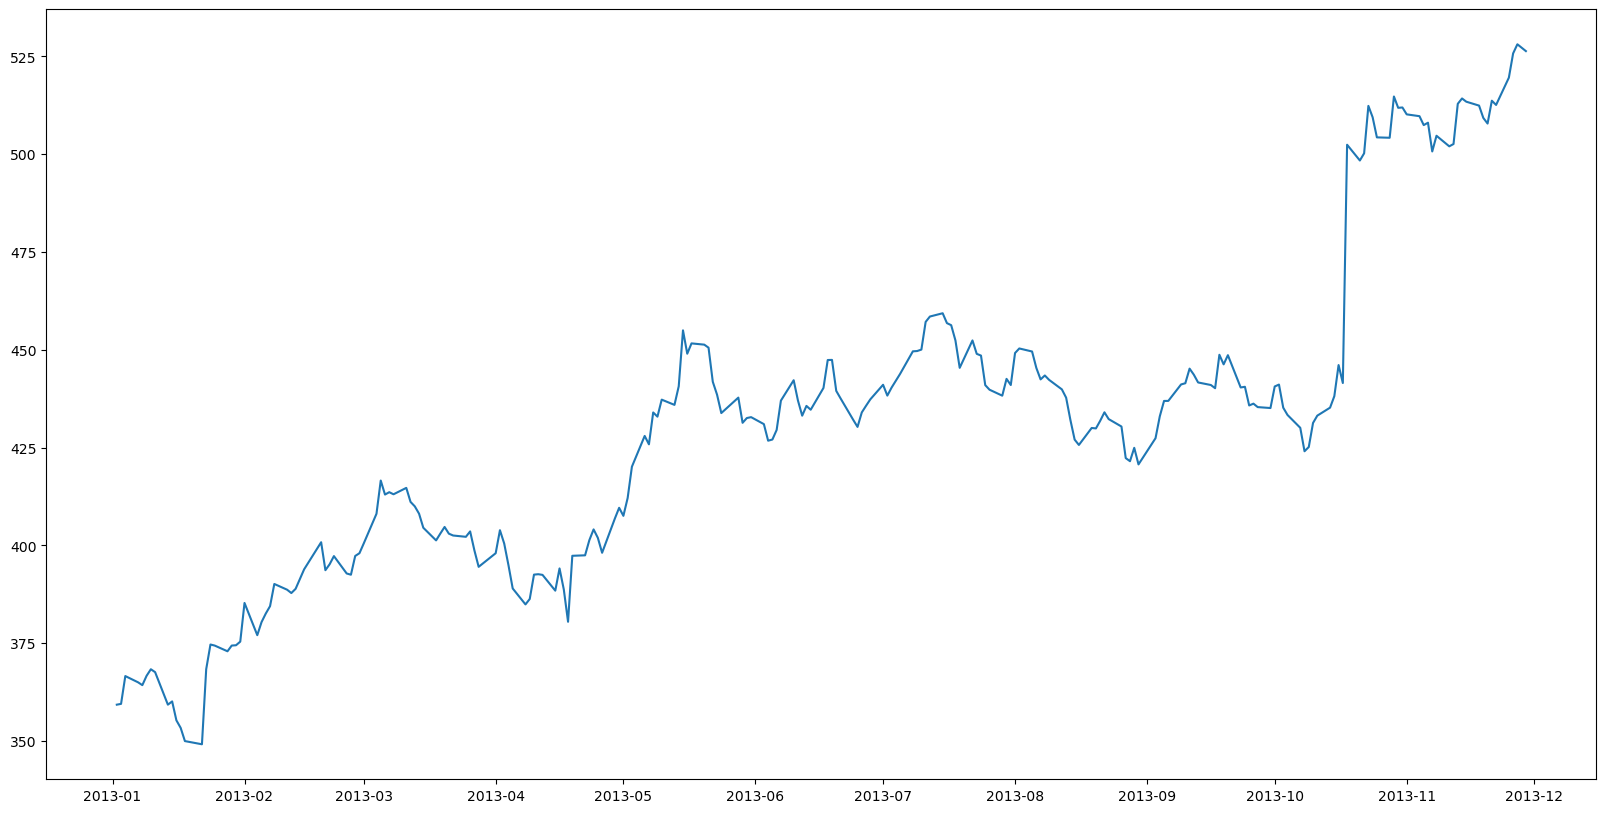

In [18]:
plt.figure(figsize=(20,10))
plt.plot(hcl)

Here , from the graph it is clear that are time series is not stationary

# Checking Stationarity

ADFuller test

In [20]:
result=adfuller(hcl)
print('adf statistic : ',result[0])
print('p Value: ',result[1])
print('critical values: ',result[2])

adf statistic :  -0.5729148991764682
p Value:  0.8769854581405806
critical values:  0


# Making Data Stationary

Applysing log transformation

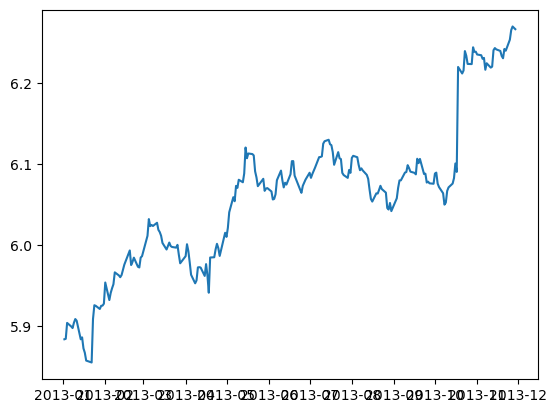

In [21]:
ts_log=np.log(hcl)
plt.plot(ts_log)

Differencing the log values 

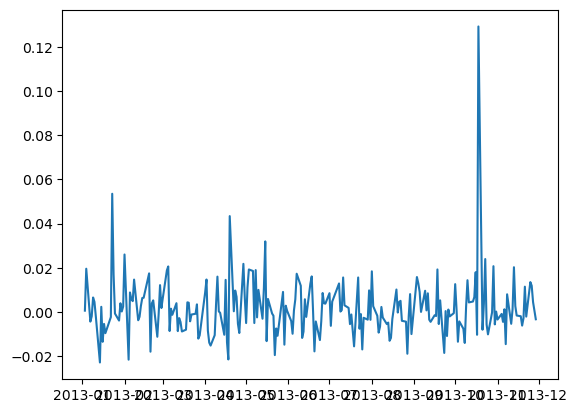

In [22]:
ts_log_diff=ts_log-ts_log.shift()
plt.plot(ts_log_diff)

Now we can see that now our time series is stationary

# Conforming using Stationarity check

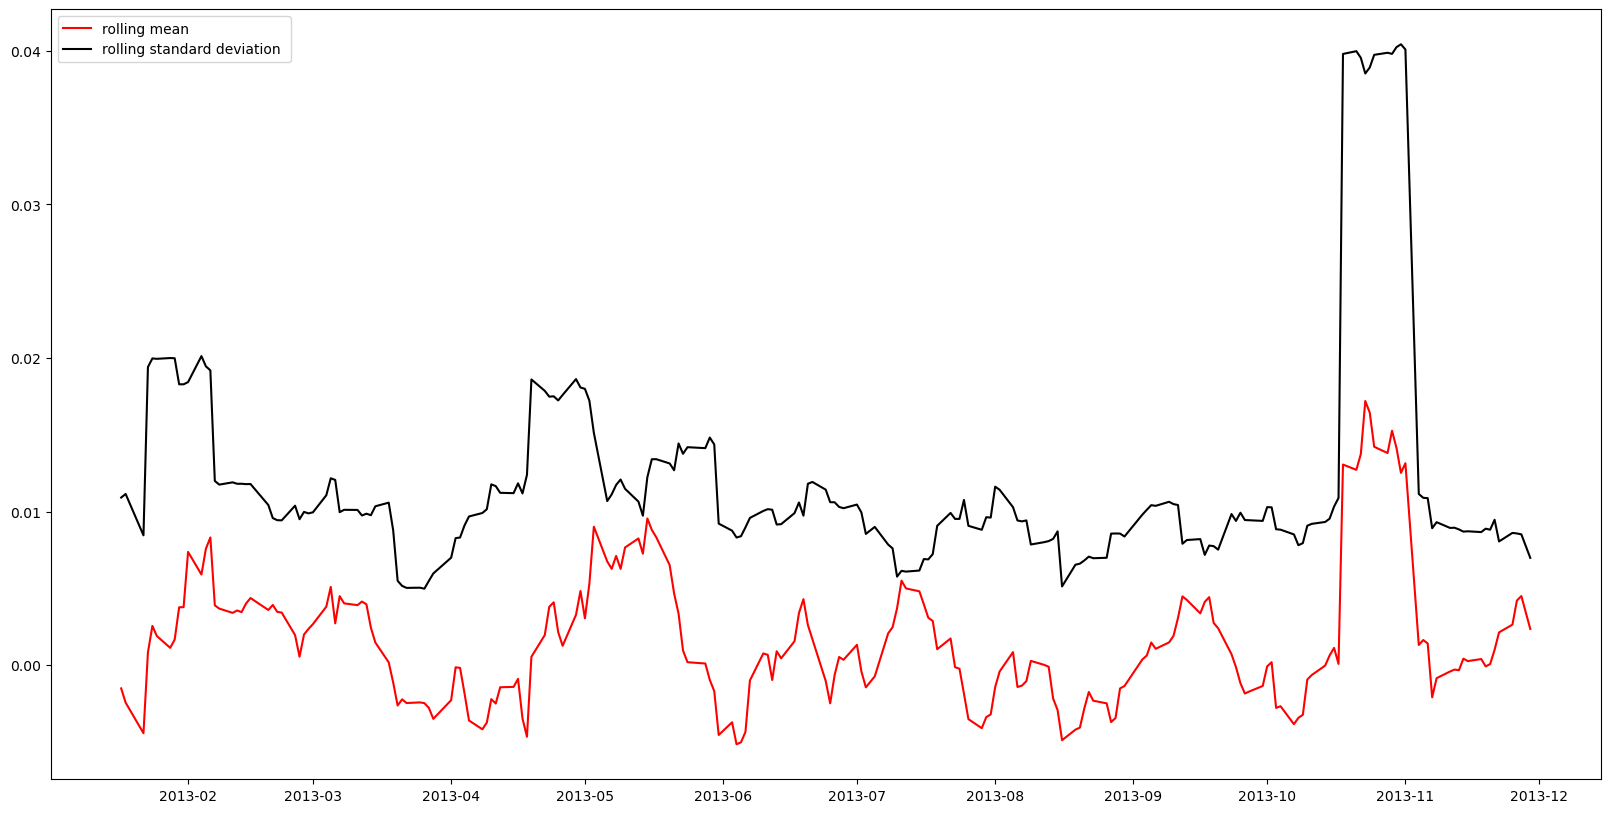

In [29]:
plt.figure(figsize=(20,10))
rollmean=ts_log_diff.rolling(11).mean()
rollstd=ts_log_diff.rolling(11).std()
plt.plot(rollmean,label='rolling mean ',color='red')
plt.plot(rollstd,label='rolling standard deviation ',color='black')
plt.legend(loc='best')


# Model Creation


In [31]:
from statsmodels.tsa.stattools import acf,pacf
log_acf=acf(ts_log_diff,nlags=20)
log_pacf=pacf(ts_log_diff,nlags=20)

# SElecting AR and MA Terms

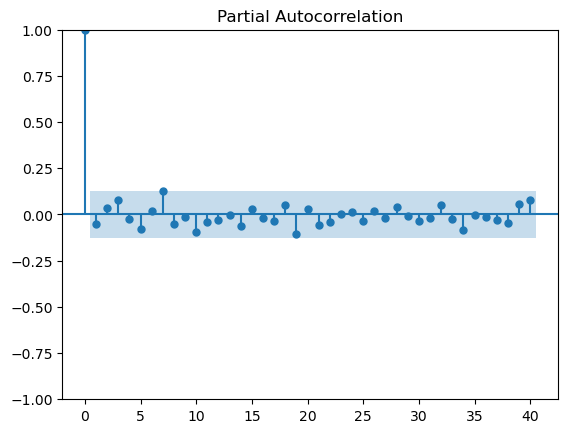

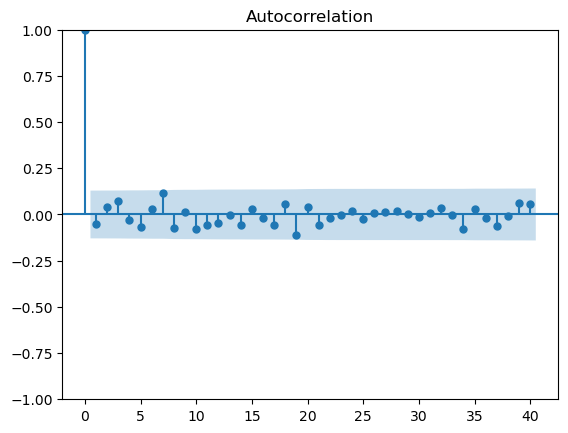

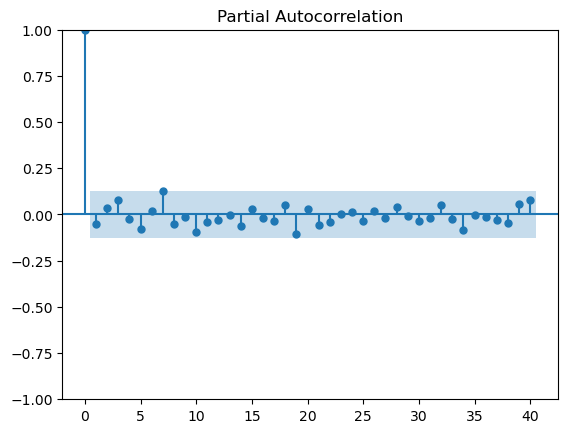

In [34]:
import statsmodels.api as sm

sm.graphics.tsa.plot_acf(ts_log_diff.dropna(),lags=40)
sm.graphics.tsa.plot_pacf(ts_log_diff.dropna(),lags=40)


# Fitting the model and predicting the values

In [35]:
from statsmodels.tsa.arima.model import ARIMA as arr

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/o

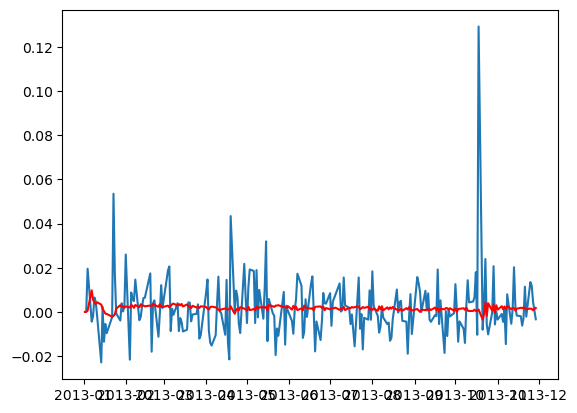

In [38]:
model=arr(ts_log_diff,order=(2,1,2))
results_arima=model.fit()
plt.plot(ts_log_diff)
plt.plot(results_arima.fittedvalues,color='red')

In [47]:
r=results_arima.predict(10,60)

In [48]:
r[0:6]

Date
2013-01-16    0.000344
2013-01-17   -0.000747
2013-01-18   -0.000895
2013-01-22   -0.002169
2013-01-23   -0.001771
2013-01-24   -0.001075
Name: predicted_mean, dtype: float64

# Model Tuning

In [39]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 16.8 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [41]:
import pmdarima as pm


In [42]:
def arimamodel(timeseries):
    automodel=pm.auto_arima(timeseries,
                           start_p=2,
                           start_q=2,
                           max_p=10,
                           max_q=10,
                           test='adf',
                           seasonal=True,
                           trace=True
                           )
    return automodel

In [43]:
arimamodel(ts_log)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1314.495, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1313.058, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1313.011, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1313.175, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1310.504, Time=0.17 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.127 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


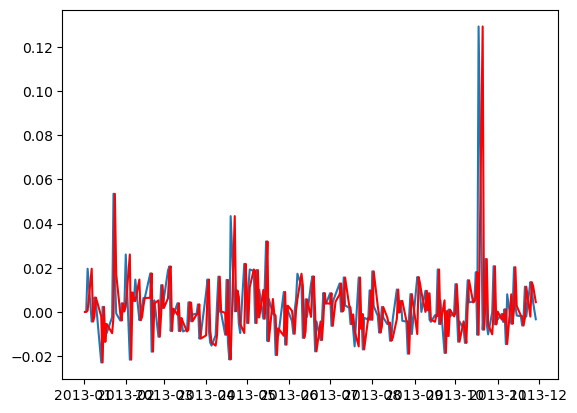

In [44]:
model2=arr(ts_log_diff,order=(0,1,0))
results_arima1=model2.fit()
plt.plot(ts_log_diff)
plt.plot(results_arima1.fittedvalues,color='red')

In [45]:
r=results_arima1.predict(10,60)


In [46]:
r[0:6]

Date
2013-01-16    0.002320
2013-01-17   -0.013527
2013-01-18   -0.005426
2013-01-22   -0.009620
2013-01-23   -0.002331
2013-01-24    0.053503
Name: predicted_mean, dtype: float64